In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
file_path = '/kaggle/input/chocolate-sales/Chocolate Sales.csv'
df = pd.read_csv(file_path)

# Cleaning

In [2]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [3]:
print(df.isna().sum())
print(df.duplicated().sum())

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64
0


In [4]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Amount'] = df['Amount'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.strip().astype(float)

# Sales Amount Distribuiton

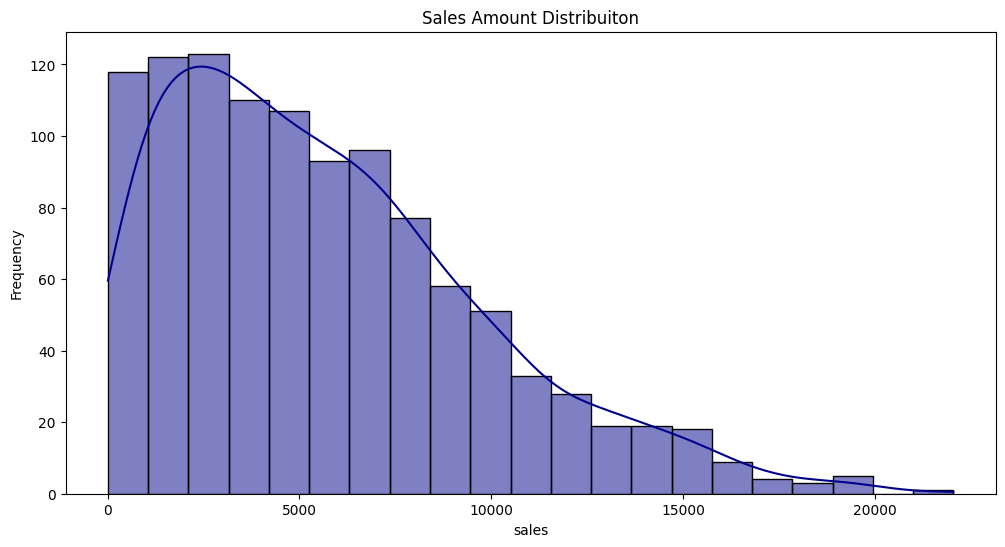

In [5]:
plt.figure(figsize=(12,6))
sns.histplot(df['Amount'], kde=True, color='darkblue')
plt.title('Sales Amount Distribuiton')
plt.xlabel('sales')
plt.ylabel('Frequency')
plt.show()

* this histogram show for how the distribuiton of the value of the each sale.
* So the majority of sales is made between $ 0,0 - $ 5000,0

# Sales by Country

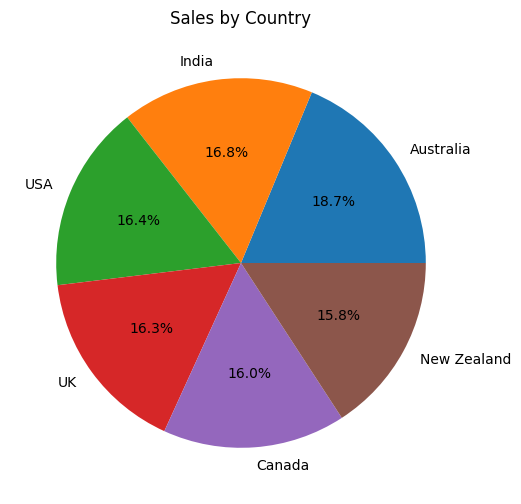

In [6]:
country_counts = df['Country'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(country_counts, labels=country_counts.index,autopct='%1.1f%%')
plt.title('Sales by Country')
plt.show()

# Sales by Product

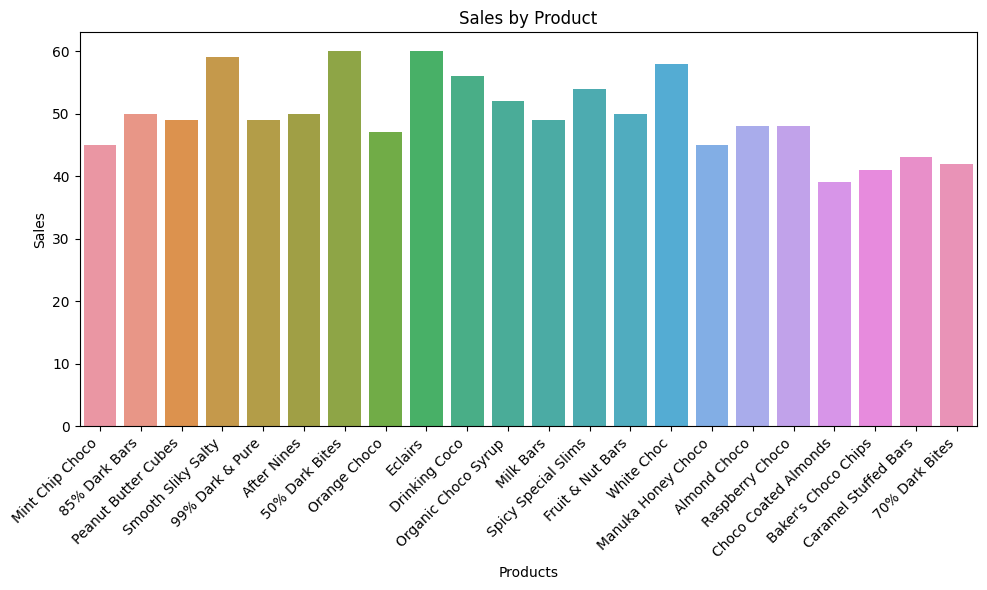

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x='Product', data=df)
plt.title("Sales by Product")
plt.xlabel('Products')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Amount per Country and Box Shipped per Country
Two tables with the total amount and boxes shipped for the country

In [8]:
chocolate_sales = df.groupby(['Country','Product'])['Amount'].sum().reset_index()
top_sale_chocolate = chocolate_sales.loc[chocolate_sales.groupby('Country')['Amount'].idxmax()]
top_sale_chocolate


,Country,Product,Amount
0,Australia,50% Dark Bites,89222.0
41,Canada,Smooth Sliky Salty,68257.0
54,India,Eclairs,79009.0
80,New Zealand,Mint Chip Choco,86709.0
105,UK,Peanut Butter Cubes,79695.0
128,USA,Raspberry Choco,83524.0


In [9]:
chocolate_q = df.groupby(['Country','Product'])['Boxes Shipped'].sum().reset_index()
top_q_chocolate = chocolate_q.loc[chocolate_q.groupby('Country')['Boxes Shipped'].idxmax()]
top_q_chocolate

,Country,Product,Boxes Shipped
0,Australia,50% Dark Bites,3182
30,Canada,Choco Coated Almonds,2452
64,India,Spicy Special Slims,2037
80,New Zealand,Mint Chip Choco,2537
101,UK,Milk Bars,2251
121,USA,Fruit & Nut Bars,2061


# The Sales in Canada

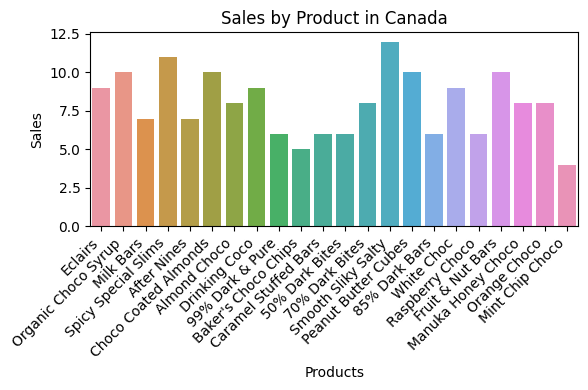

In [10]:
canada_sales = df[df["Country"] == "Canada"]
canada_chocolate_sales = canada_sales.groupby("Product")["Amount"].sum().reset_index()
canada_chocolate_sales

plt.figure(figsize=(6,4))
sns.countplot(x='Product', data=canada_sales)
plt.title("Sales by Product in Canada")
plt.xlabel('Products')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This 'Sales by Product in Canada' can be done with any other country and can be compared between countrys

# Parallel between the most sales chocolate between USA and Canada

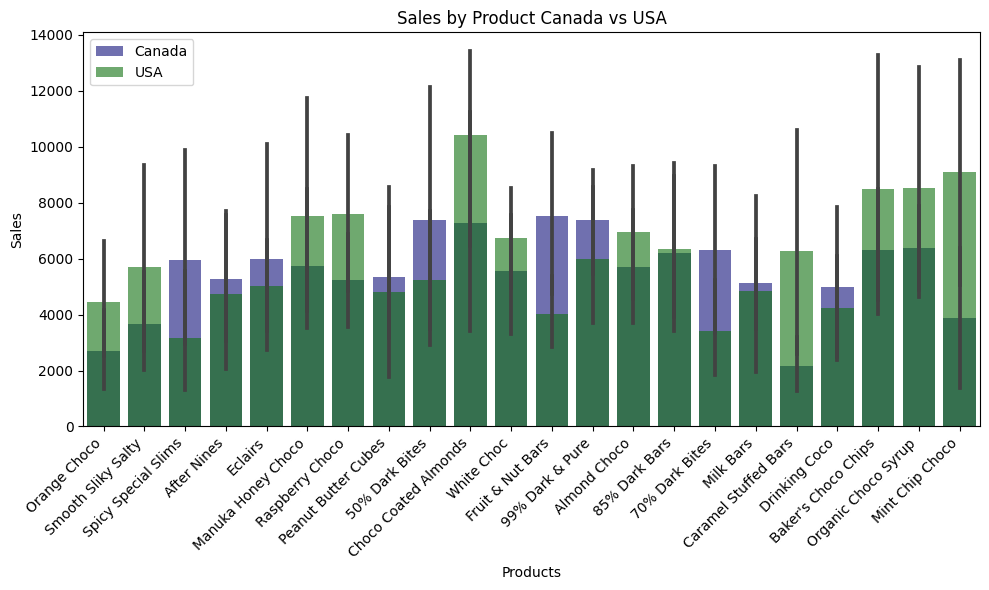

In [11]:
canada_sales = df[df["Country"] == "Canada"]
canada_chocolate_sales = canada_sales.groupby("Product")["Amount"].sum().reset_index()
usa_sales = df[df["Country"] == "USA"]
usa_chocolate_sales = usa_sales.groupby("Product")["Amount"].sum().reset_index()
canada_chocolate_sales

plt.figure(figsize=(10,6))
sns.barplot(data=canada_sales, x='Product', y='Amount', color='darkblue', alpha=0.6, label='Canada')
sns.barplot(data=usa_sales, x='Product', y='Amount', color='green', alpha=0.6, label= 'USA')
plt.title("Sales by Product Canada vs USA")
plt.xlabel('Products')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Sales By Sellers

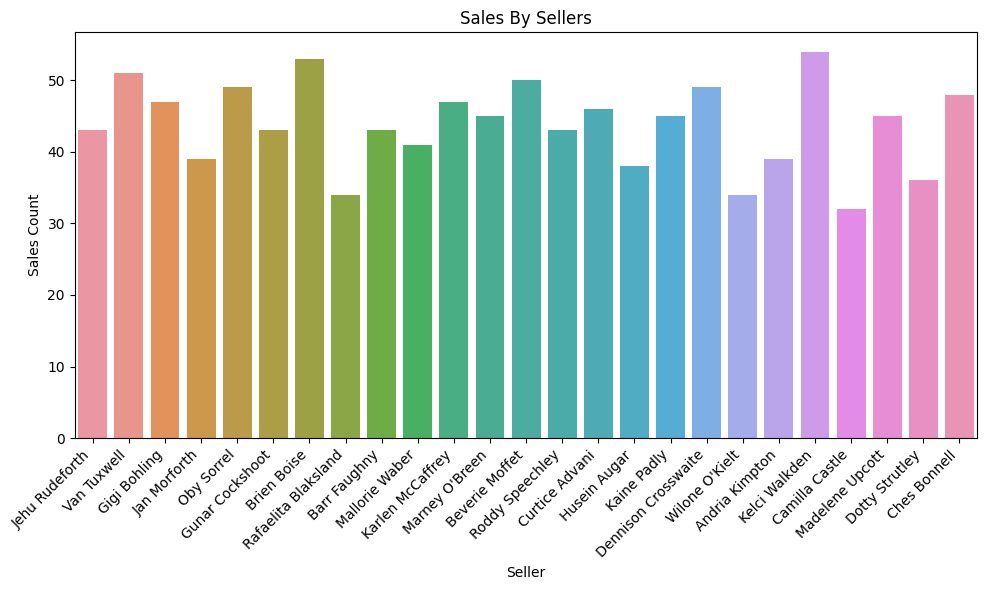

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Sales Person')
plt.title('Sales By Sellers')
plt.xlabel('Seller')
plt.ylabel('Sales Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Sales Amount By Sellers

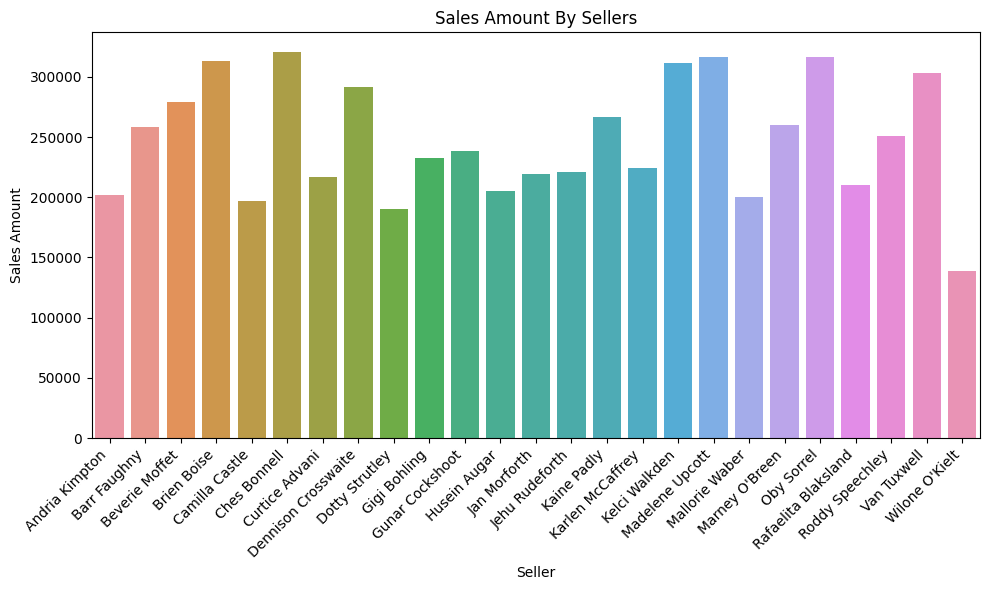

In [13]:
sales_by_sellers = df.groupby('Sales Person').agg({'Amount':'sum'}).reset_index()
sales_by_sellers.columns = ['Sales Person', 'Total Amount']

plt.figure(figsize=(10,6))
sns.barplot(data=sales_by_sellers, x='Sales Person', y='Total Amount')
plt.title('Sales Amount By Sellers')
plt.xlabel('Seller')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Parallel between the Total Sales and Sales Quantity by Seller

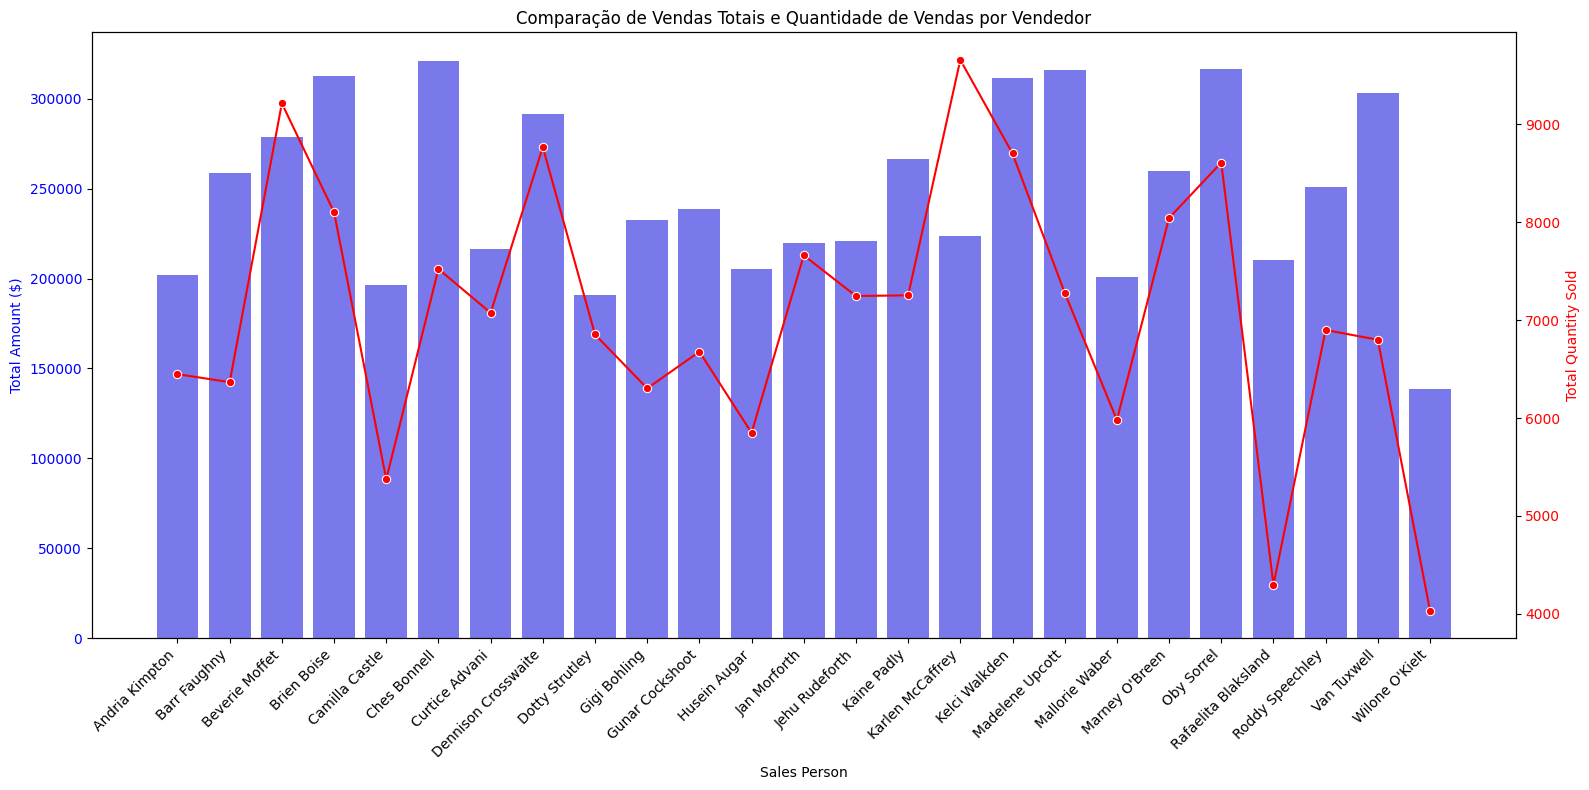

In [20]:
#chocolate_q = df.groupby(['Country','Product'])['Boxes Shipped'].sum().reset_index()
sales_by_sellers = df.groupby('Sales Person').agg({'Amount': 'sum', 'Boxes Shipped': 'sum'}).reset_index()
sales_by_sellers.columns = ['Sales Person', 'Total Amount', 'Total Quantity']


fig, ax1 = plt.subplots(figsize=(16, 8))
sns.barplot(data=sales_by_sellers, x='Sales Person', y='Total Amount', color='blue', alpha=0.6, ax=ax1)
ax1.set_ylabel('Total Amount ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
sns.lineplot(data=sales_by_sellers, x='Sales Person', y='Total Quantity', marker='o', color='red', ax=ax2)
ax2.set_ylabel('Total Quantity Sold', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
plt.title('Parallel between the Total Sales and Sales Quantity by Seller')
plt.tight_layout()
plt.show()
